# Examples

This notebook provides some examples of how to use Time Blender.

In [3]:
from time_blender.random_events import *
from time_blender.deterministic_events import *
from time_blender.coordination_events import *

from time_blender.core import *
from time_blender.models import SimpleModels, ClassicModels, BankingModels, EconomicModels, EcologyModels

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd


/home/salem/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [4]:
matplotlib.rcParams['interactive'] = True
matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]

Let us define a helper function to generate and plot the models.

In [5]:
def generate_and_plot(models, start_date=pd.Timestamp(2018, 1, 1), end_date=pd.Timestamp(2018, 6, 30), 
                      n=1, freq='D'):
    
    data = generate(models, start_date, end_date, n=n, freq=freq)

    # plot
    for i in range(0, n):
        data[i].plot()
        plt.show()
    

## Predefined Models

The easiest way to use TimeBlender is through the predefined models that ship with it. These are, in fact, examples of the kinds of models that can be built, so users can also take them as inspiration for their own custom models.

### Simple Models

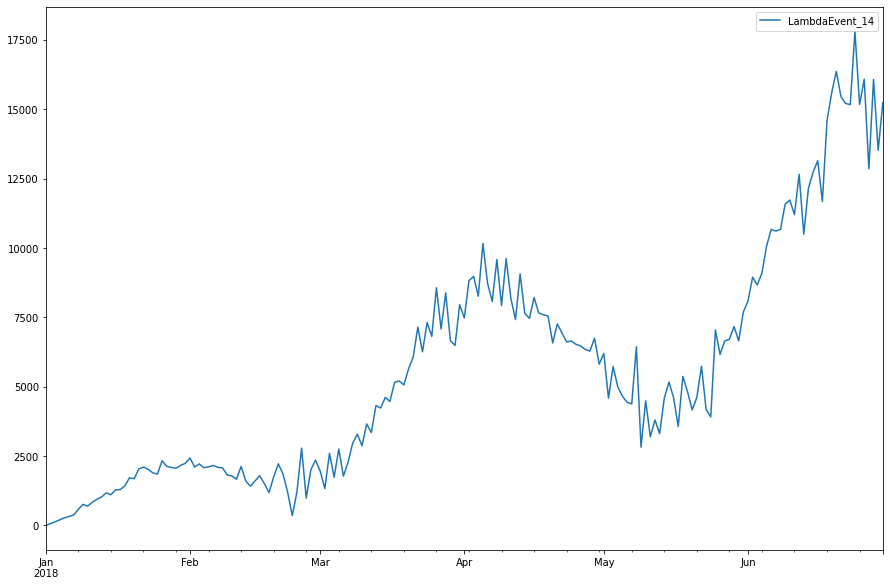

In [6]:
model = SimpleModels.cycle()
generate_and_plot(model, n=1)

### Classic Models: ARMA

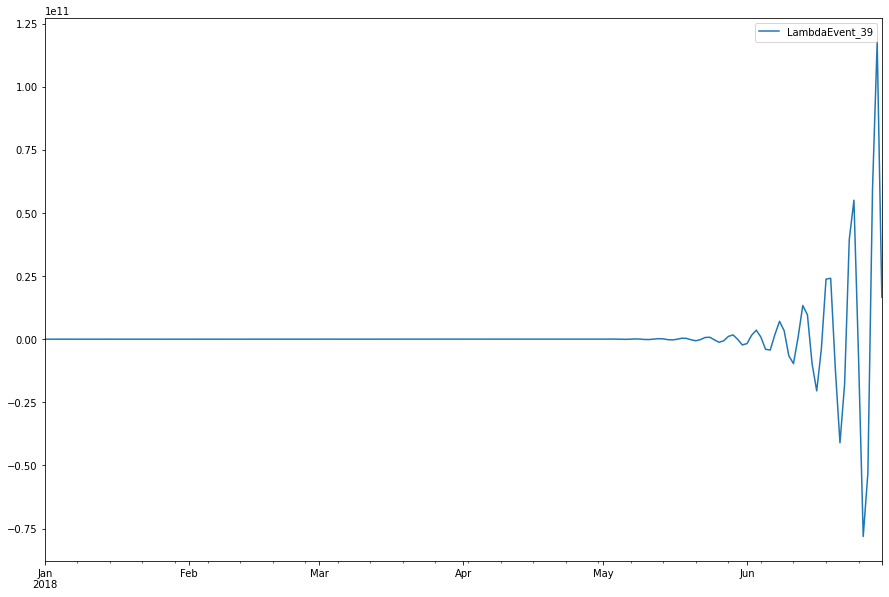

In [5]:
model = ClassicModels.ar(4)
generate_and_plot(model, n=1)

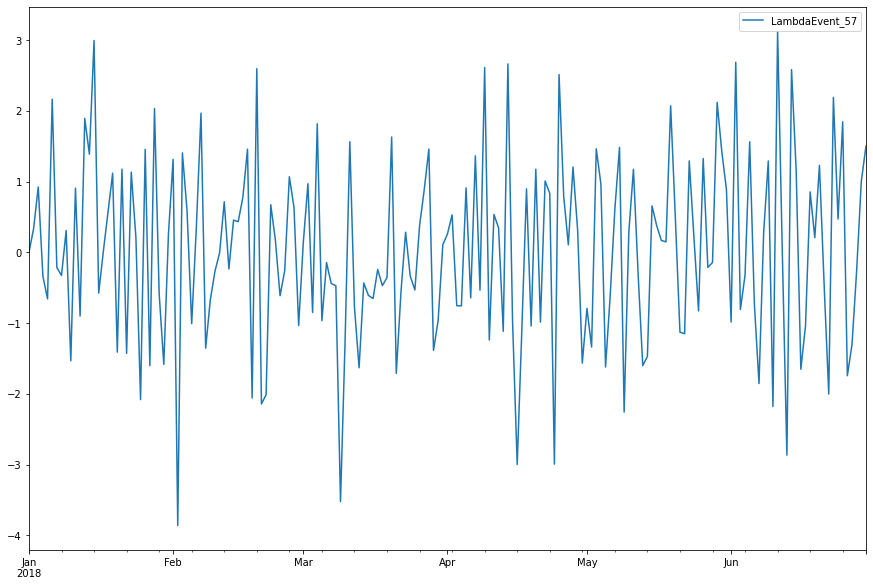

In [6]:
model = ClassicModels.ma(4)
generate_and_plot(model, n=1)

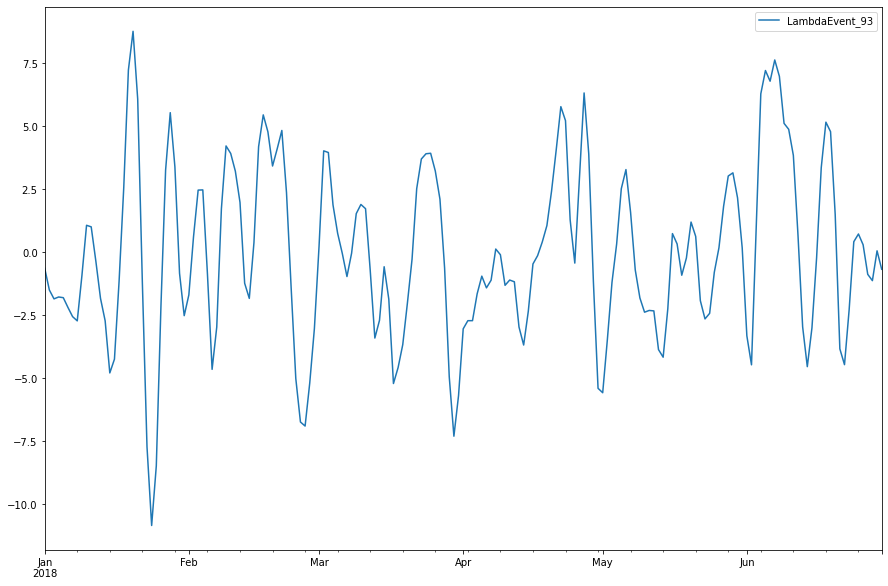

In [7]:
model = ClassicModels.arma(4, 2)
generate_and_plot(model, n=1)

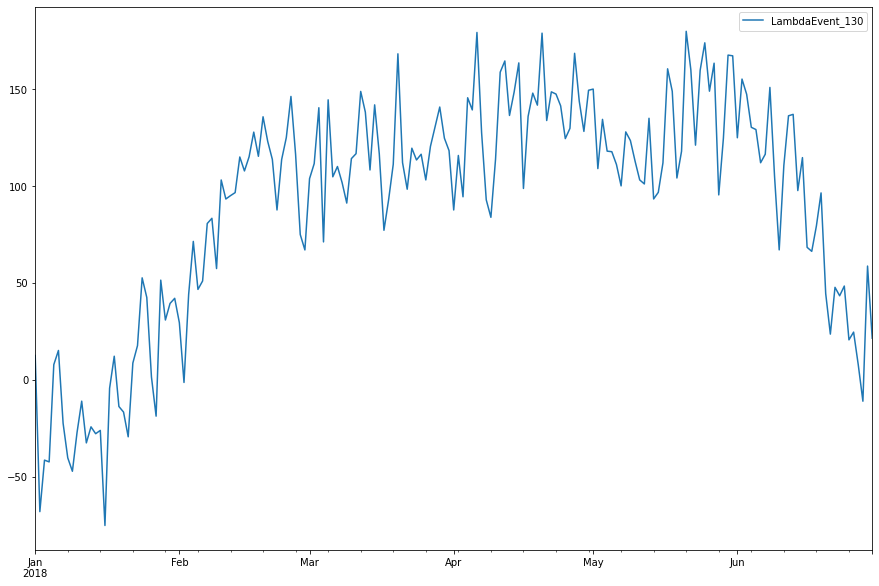

In [8]:
model = ClassicModels.ar(6, error_std=10, coefs=[0.5, 0, 0, 0.3, 0.1, 0.1])
generate_and_plot(model, n=1)

### Banking

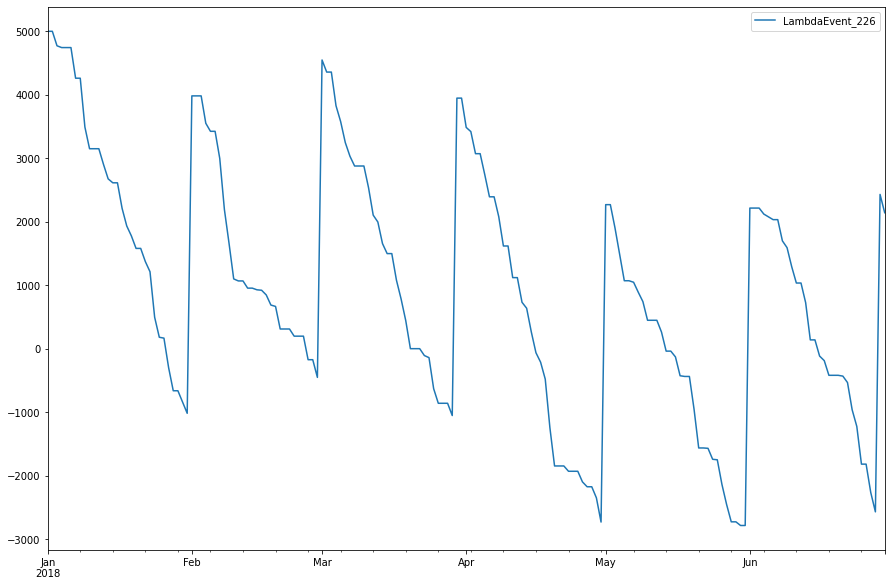

In [40]:
model = BankingModels.salary_earner(expense_mean=100.0, expense_sd=300.0)
generate_and_plot(model, n=1)

### Economics

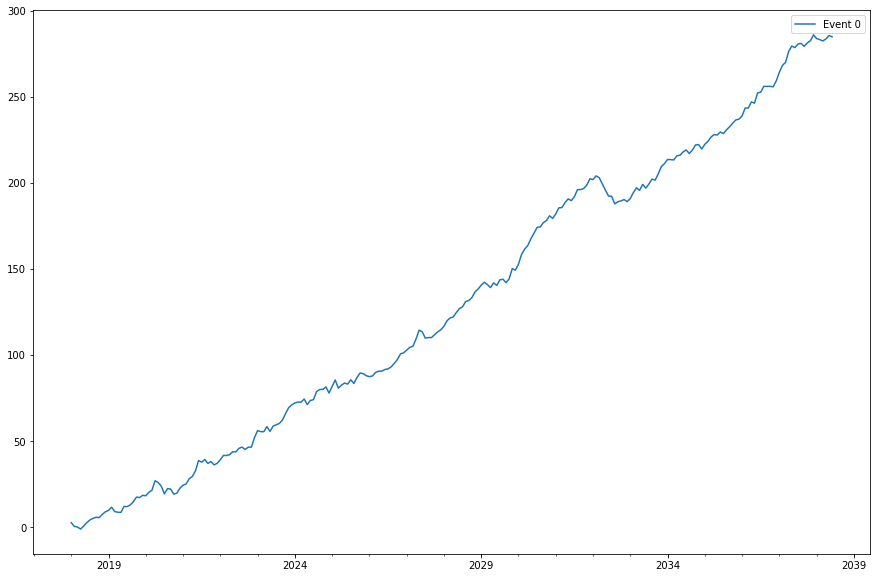

[               Event 0
 2018-01-01    2.454523
 2018-02-01    0.266899
 2018-03-01   -0.027319
 2018-04-01   -1.270785
 2018-05-01    0.495164
 2018-06-01    2.428690
 2018-07-01    4.043424
 2018-08-01    4.951867
 2018-09-01    5.590385
 2018-10-01    5.389062
 2018-11-01    7.263056
 2018-12-01    8.773386
 2019-01-01    9.595517
 2019-02-01   11.442952
 2019-03-01    8.929542
 2019-04-01    8.500674
 2019-05-01    8.452217
 2019-06-01   11.885560
 2019-07-01   11.813422
 2019-08-01   12.755353
 2019-09-01   14.645356
 2019-10-01   17.318745
 2019-11-01   17.035539
 2019-12-01   18.359430
 2020-01-01   18.088997
 2020-02-01   20.082132
 2020-03-01   21.337514
 2020-04-01   26.828889
 2020-05-01   25.755826
 2020-06-01   23.630315
 ...                ...
 2036-01-01  238.750876
 2036-02-01  243.388317
 2036-03-01  243.367443
 2036-04-01  246.921839
 2036-05-01  246.156609
 2036-06-01  252.186153
 2036-07-01  252.531384
 2036-08-01  255.945754
 2036-09-01  255.913136
 2036-10-01  255

In [11]:
model = EconomicModels.kondratiev_business_cycle(base = 0.0, growth_mean = 1, growth_sd = 2,
                                                 wave_period= 72, wave_amplitude = 0.05)

generate_and_plot(model, n=1, end_date=pd.Timestamp(2038, 6, 30), freq='MS')

### Ecology 

The predator-prey relationship, as defined by so-called [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations), is a classical ecological model. The equations are continuous, but here a discrete version is provided. Despite their simplicity, the behavior is actually quite surprising, owing to chaotic dynamics. For example, consider this first model.

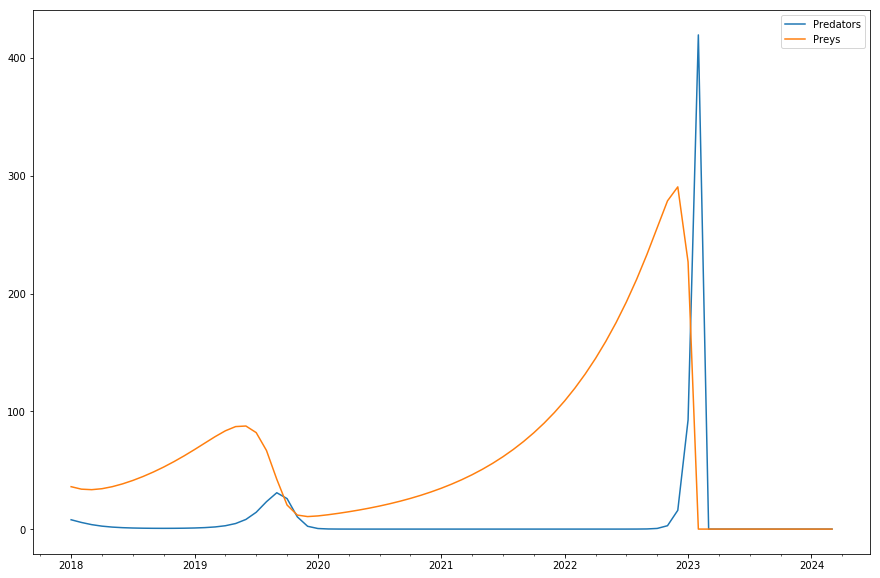

In [12]:
predators_model, preys_model = EcologyModels.predator_prey(n_predators=10, n_preys=40,
                                                                   alpha=1.1, beta=0.02, delta=0.02, gamma=0.008)


data = generate_and_plot([predators_model,preys_model], start_date=pd.Timestamp(2018, 1, 1), end_date=pd.Timestamp(2024, 3, 30), 
                  freq='MS')

Now let us increase the `delta` parameter, which controls the predators' reproduction, in order to observe  different result. 

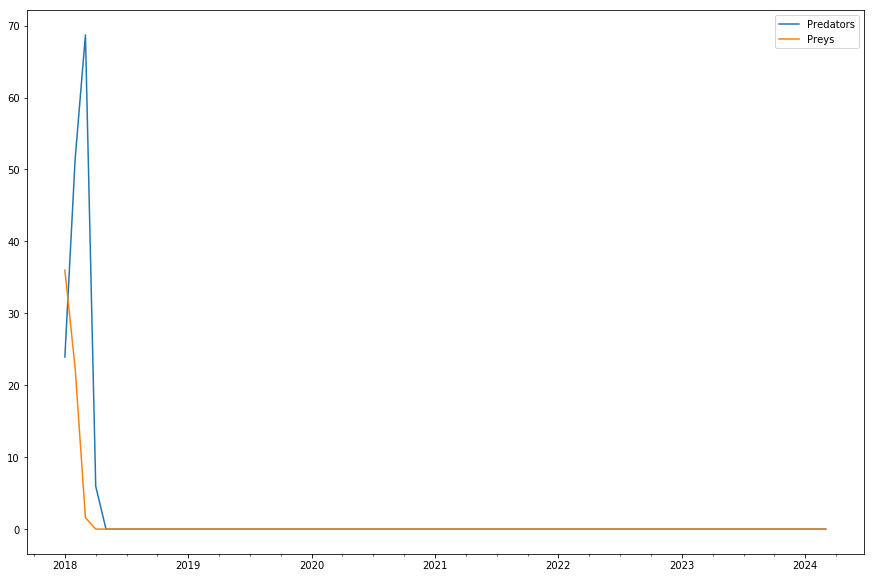

In [13]:
predators_model, preys_model = EcologyModels.predator_prey(n_predators=10, n_preys=40,
                                                                   alpha=1.1, beta=0.02, delta=0.06, gamma=0.008)


data = generate_and_plot([predators_model,preys_model], start_date=pd.Timestamp(2018, 1, 1), end_date=pd.Timestamp(2024, 3, 30), 
                  freq='MS')

We see that the predators reproduce so efficiently that there is no time to allow the prey population to recover, causing both to be quickly extinct.

## Custom Models
The above predefined models are built using events provided by TimeBlender. Here, we will see some of these and how to combine them.

### Model Addition

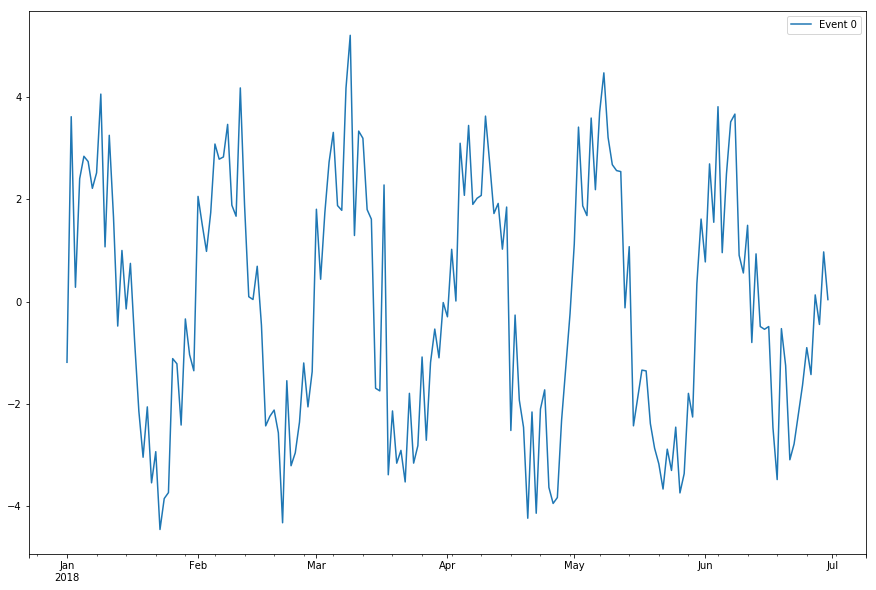

[             Event 0
 2018-01-01 -1.189456
 2018-01-02  3.615618
 2018-01-03  0.278424
 2018-01-04  2.402551
 2018-01-05  2.841283
 2018-01-06  2.738847
 2018-01-07  2.214057
 2018-01-08  2.517539
 2018-01-09  4.057848
 2018-01-10  1.069418
 2018-01-11  3.251492
 2018-01-12  1.652312
 2018-01-13 -0.480469
 2018-01-14  0.998584
 2018-01-15 -0.145387
 2018-01-16  0.745917
 2018-01-17 -0.781630
 2018-01-18 -2.146050
 2018-01-19 -3.046988
 2018-01-20 -2.061606
 2018-01-21 -3.547519
 2018-01-22 -2.938042
 2018-01-23 -4.460348
 2018-01-24 -3.854882
 2018-01-25 -3.738661
 2018-01-26 -1.117001
 2018-01-27 -1.218382
 2018-01-28 -2.416959
 2018-01-29 -0.340984
 2018-01-30 -1.040108
 ...              ...
 2018-06-01  0.774347
 2018-06-02  2.692263
 2018-06-03  1.550079
 2018-06-04  3.811093
 2018-06-05  0.955671
 2018-06-06  2.494131
 2018-06-07  3.514686
 2018-06-08  3.666750
 2018-06-09  0.904264
 2018-06-10  0.558275
 2018-06-11  1.490685
 2018-06-12 -0.802172
 2018-06-13  0.932044
 2018-06-1

In [14]:
norm = NormalEvent(0, 1)
we = WaveEvent(30, 3)

compos = norm + we

generate_and_plot(compos)

### Random Walk

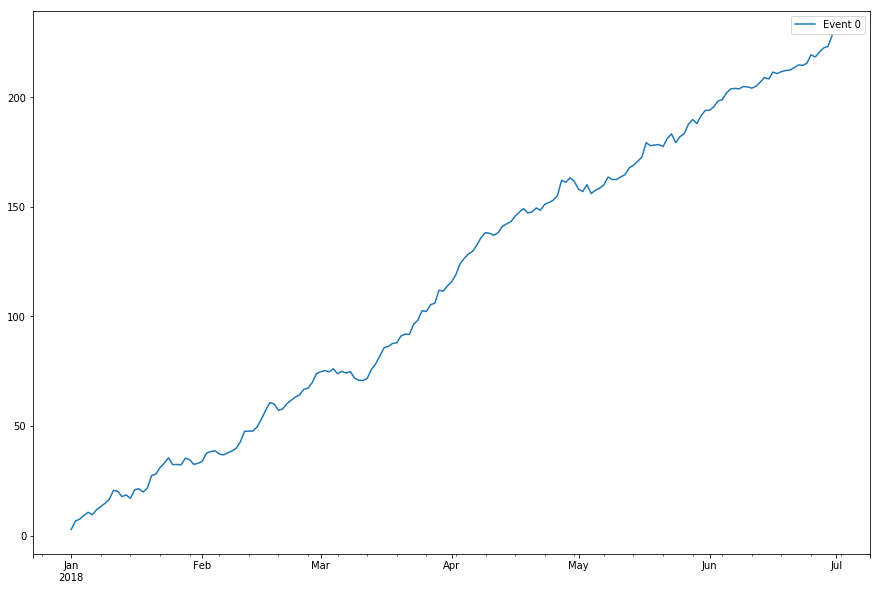

[               Event 0
 2018-01-01    2.755661
 2018-01-02    6.632986
 2018-01-03    7.465878
 2018-01-04    9.230124
 2018-01-05   10.583351
 2018-01-06    9.506030
 2018-01-07   11.797906
 2018-01-08   13.252818
 2018-01-09   14.714688
 2018-01-10   16.516183
 2018-01-11   20.654302
 2018-01-12   20.200462
 2018-01-13   17.768668
 2018-01-14   18.520882
 2018-01-15   16.970179
 2018-01-16   20.911717
 2018-01-17   21.348286
 2018-01-18   19.851288
 2018-01-19   21.670260
 2018-01-20   27.334495
 2018-01-21   28.026662
 2018-01-22   30.980650
 2018-01-23   32.985168
 2018-01-24   35.464645
 2018-01-25   32.384694
 2018-01-26   32.436338
 2018-01-27   32.293946
 2018-01-28   35.333982
 2018-01-29   34.589275
 2018-01-30   32.468868
 ...                ...
 2018-06-01  194.120995
 2018-06-02  195.742466
 2018-06-03  198.339975
 2018-06-04  198.933271
 2018-06-05  202.042162
 2018-06-06  203.924215
 2018-06-07  204.109090
 2018-06-08  203.912232
 2018-06-09  204.995535
 2018-06-10  204

In [15]:
model = WalkEvent(0, NormalEvent(1, 2))
generate_and_plot(model, n=1)

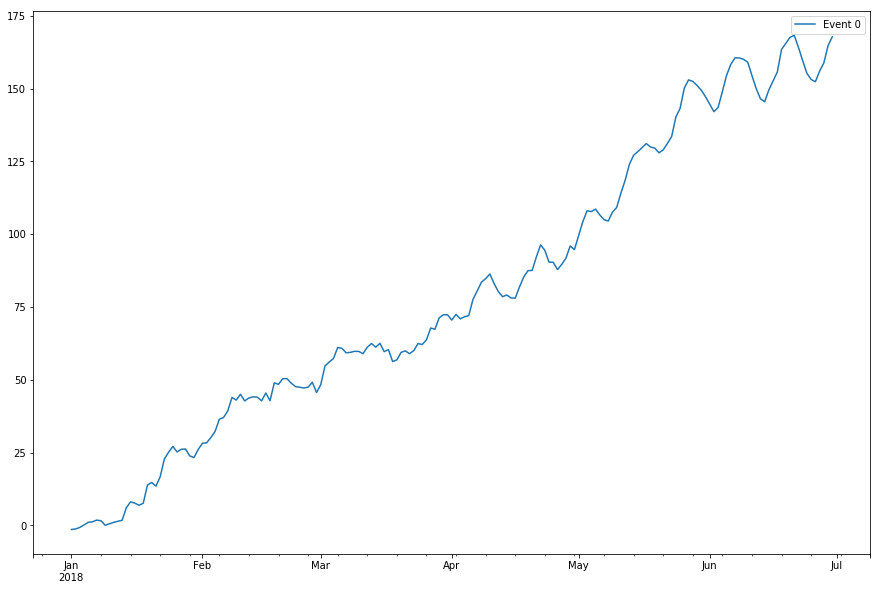

[               Event 0
 2018-01-01   -1.391829
 2018-01-02   -1.216053
 2018-01-03   -0.671494
 2018-01-04    0.166653
 2018-01-05    1.087524
 2018-01-06    1.246716
 2018-01-07    1.825512
 2018-01-08    1.611265
 2018-01-09    0.058154
 2018-01-10    0.555935
 2018-01-11    1.071964
 2018-01-12    1.427839
 2018-01-13    1.782725
 2018-01-14    6.072317
 2018-01-15    8.100681
 2018-01-16    7.674292
 2018-01-17    6.931272
 2018-01-18    7.618436
 2018-01-19   13.867734
 2018-01-20   14.740617
 2018-01-21   13.486125
 2018-01-22   16.679080
 2018-01-23   22.819353
 2018-01-24   25.165069
 2018-01-25   27.122891
 2018-01-26   25.248612
 2018-01-27   26.143391
 2018-01-28   26.263087
 2018-01-29   23.892229
 2018-01-30   23.320424
 ...                ...
 2018-06-01  144.678514
 2018-06-02  142.105354
 2018-06-03  143.587649
 2018-06-04  149.009023
 2018-06-05  154.608932
 2018-06-06  158.379879
 2018-06-07  160.609039
 2018-06-08  160.556874
 2018-06-09  160.110062
 2018-06-10  159

In [16]:
we = WaveEvent(12, 0.05)
model = WalkEvent(0, NormalEvent(1, 2)) * (ConstantEvent(1) + we)
generate_and_plot(model, n=1)

### More Complex Functional Compositions

Let's model a series that changes its behavior once, and such that each new behavior is itself a composition.

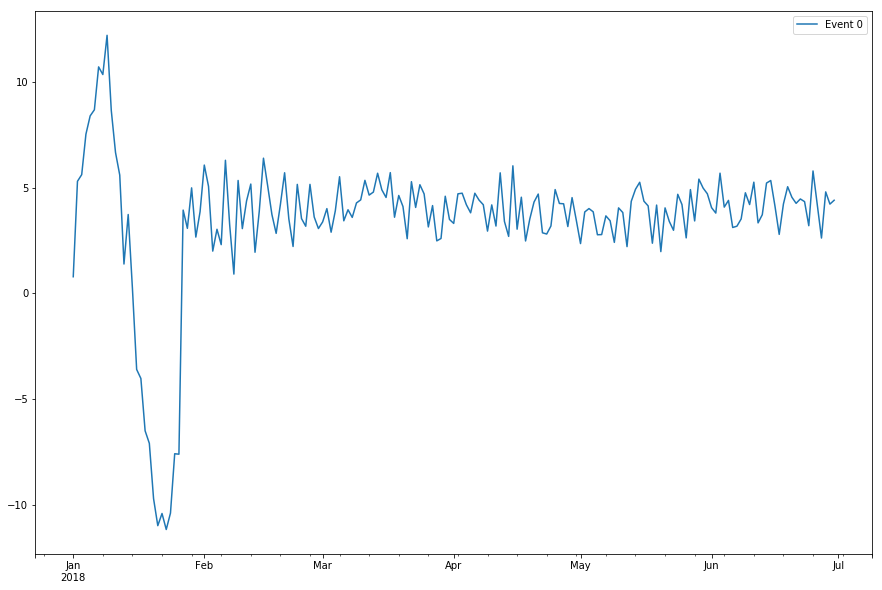

[              Event 0
 2018-01-01   0.784635
 2018-01-02   5.295871
 2018-01-03   5.609661
 2018-01-04   7.521140
 2018-01-05   8.385411
 2018-01-06   8.674862
 2018-01-07  10.701945
 2018-01-08  10.340892
 2018-01-09  12.194449
 2018-01-10   8.637922
 2018-01-11   6.655958
 2018-01-12   5.588360
 2018-01-13   1.385812
 2018-01-14   3.725654
 2018-01-15   0.232710
 2018-01-16  -3.597338
 2018-01-17  -4.023489
 2018-01-18  -6.495319
 2018-01-19  -7.089092
 2018-01-20  -9.701498
 2018-01-21 -10.979393
 2018-01-22 -10.404007
 2018-01-23 -11.160458
 2018-01-24 -10.384749
 2018-01-25  -7.581021
 2018-01-26  -7.601641
 2018-01-27   3.933688
 2018-01-28   3.071898
 2018-01-29   4.984766
 2018-01-30   2.658848
 ...               ...
 2018-06-01   4.049442
 2018-06-02   3.792916
 2018-06-03   5.679030
 2018-06-04   4.075039
 2018-06-05   4.392907
 2018-06-06   3.111861
 2018-06-07   3.173321
 2018-06-08   3.515783
 2018-06-09   4.752637
 2018-06-10   4.195742
 2018-06-11   5.253590
 2018-06-12

In [17]:
const = ConstantEvent(4)
norm = NormalEvent(0, 1)
we = WaveEvent(30, 10)
t_change = Once(UniformEvent(0, 90))

compos1 = we + norm
compos2 = const + norm

def aux(t, i, memory):
    if i <= t_change.execute(t):
        return compos1.execute(t)
    else:
        return compos2.execute(t)

e = LambdaEvent(aux)

generate_and_plot(e)

We can also implement such regime change using the `Piecewise` event.

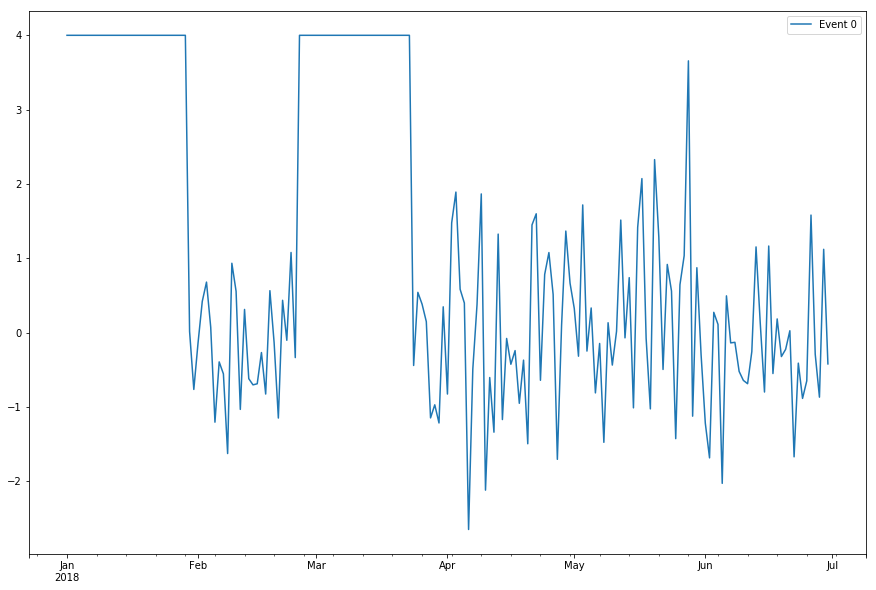

[             Event 0
 2018-01-01  4.000000
 2018-01-02  4.000000
 2018-01-03  4.000000
 2018-01-04  4.000000
 2018-01-05  4.000000
 2018-01-06  4.000000
 2018-01-07  4.000000
 2018-01-08  4.000000
 2018-01-09  4.000000
 2018-01-10  4.000000
 2018-01-11  4.000000
 2018-01-12  4.000000
 2018-01-13  4.000000
 2018-01-14  4.000000
 2018-01-15  4.000000
 2018-01-16  4.000000
 2018-01-17  4.000000
 2018-01-18  4.000000
 2018-01-19  4.000000
 2018-01-20  4.000000
 2018-01-21  4.000000
 2018-01-22  4.000000
 2018-01-23  4.000000
 2018-01-24  4.000000
 2018-01-25  4.000000
 2018-01-26  4.000000
 2018-01-27  4.000000
 2018-01-28  4.000000
 2018-01-29  4.000000
 2018-01-30  0.014133
 ...              ...
 2018-06-01 -1.220420
 2018-06-02 -1.686661
 2018-06-03  0.272106
 2018-06-04  0.109719
 2018-06-05 -2.029715
 2018-06-06  0.493808
 2018-06-07 -0.139238
 2018-06-08 -0.131395
 2018-06-09 -0.523492
 2018-06-10 -0.643908
 2018-06-11 -0.688589
 2018-06-12 -0.256771
 2018-06-13  1.152330
 2018-06-1

In [18]:
const = ConstantEvent(4)
norm = NormalEvent(0, 1)
#we = WaveEvent(30, 10)

model = Piecewise([const, norm, const, norm],  t_separators=[NormalEvent(30, 5), 
                                                             NormalEvent(60, 5), 
                                                             NormalEvent(90, 5)])

generate_and_plot(model)

We have seen so far arithimetic and piecewise combination. It is also possible, however, to implement more complex interactions. Here, we will define a top resistance with respect to a random walk. Note that, for this to work, the value after the resistance must be passed back to the underlying random walk event. This is achieved transparently.

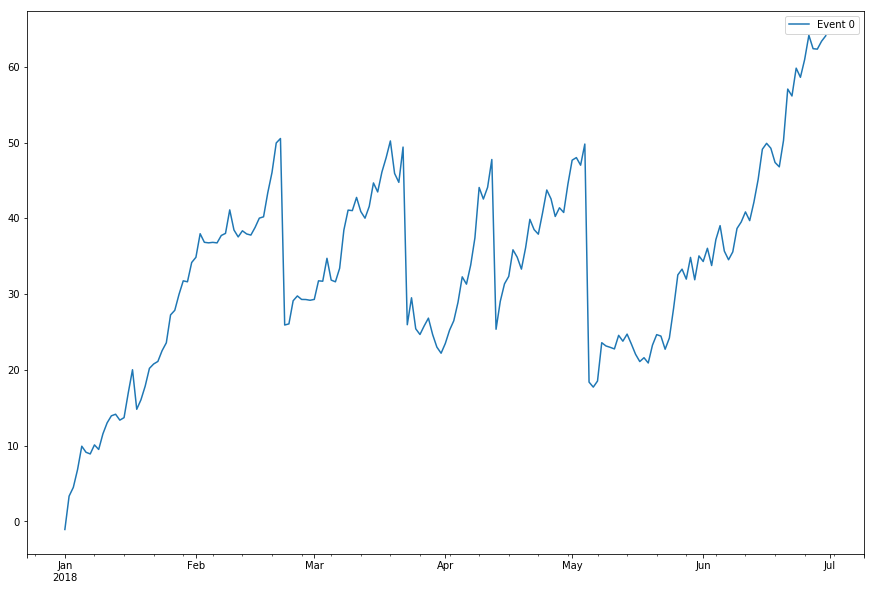

[              Event 0
 2018-01-01  -1.065278
 2018-01-02   3.337899
 2018-01-03   4.495679
 2018-01-04   6.839992
 2018-01-05   9.927134
 2018-01-06   9.127248
 2018-01-07   8.907828
 2018-01-08  10.102735
 2018-01-09   9.498174
 2018-01-10  11.561063
 2018-01-11  13.014321
 2018-01-12  13.939681
 2018-01-13  14.147543
 2018-01-14  13.370294
 2018-01-15  13.698432
 2018-01-16  16.981025
 2018-01-17  20.021939
 2018-01-18  14.801964
 2018-01-19  16.060892
 2018-01-20  17.860351
 2018-01-21  20.202298
 2018-01-22  20.780098
 2018-01-23  21.116665
 2018-01-24  22.540722
 2018-01-25  23.580027
 2018-01-26  27.258277
 2018-01-27  27.866284
 2018-01-28  29.965741
 2018-01-29  31.756649
 2018-01-30  31.630865
 ...               ...
 2018-06-01  34.309731
 2018-06-02  36.053700
 2018-06-03  33.776795
 2018-06-04  37.200306
 2018-06-05  39.042514
 2018-06-06  35.684229
 2018-06-07  34.541509
 2018-06-08  35.577441
 2018-06-09  38.671479
 2018-06-10  39.530463
 2018-06-11  40.855226
 2018-06-12

In [19]:
base = WalkEvent(0, NormalEvent(1, 2))
resistance_1 = NormalEvent(0.5, 0.1)
model = TopResistance(base, 
                      resistance_value_begin=50,
                      resistance_value_end=55,
                      resistance_probability=0.5, 
                      resistance_strength_event=resistance_1)

generate_and_plot(model)

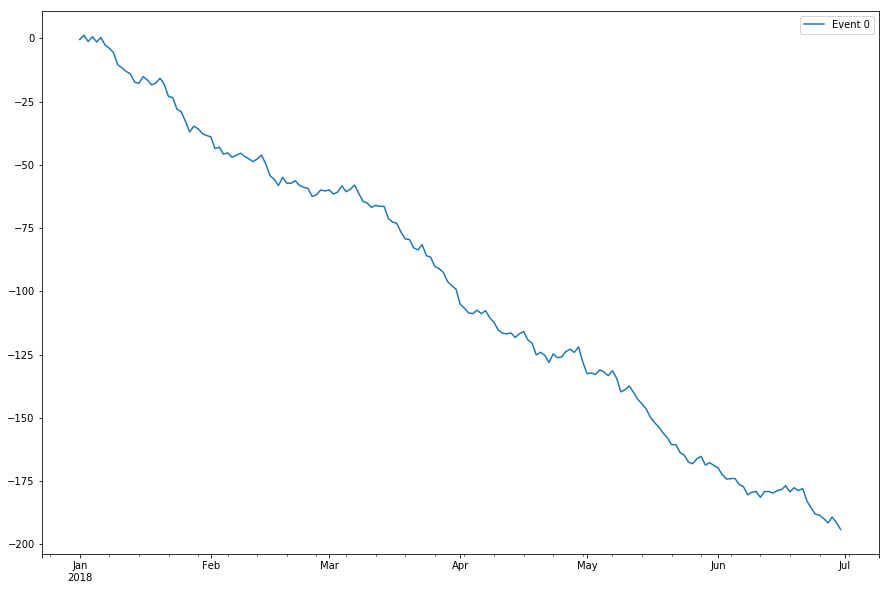

[               Event 0
 2018-01-01   -0.460187
 2018-01-02    1.211191
 2018-01-03   -1.278343
 2018-01-04    0.654164
 2018-01-05   -1.430915
 2018-01-06    0.316014
 2018-01-07   -2.630911
 2018-01-08   -3.894012
 2018-01-09   -5.654201
 2018-01-10  -10.454603
 2018-01-11  -11.670628
 2018-01-12  -13.077620
 2018-01-13  -14.079647
 2018-01-14  -17.328191
 2018-01-15  -17.766297
 2018-01-16  -15.099767
 2018-01-17  -16.404447
 2018-01-18  -18.404489
 2018-01-19  -17.666038
 2018-01-20  -15.751079
 2018-01-21  -18.214075
 2018-01-22  -22.999842
 2018-01-23  -23.388429
 2018-01-24  -28.049783
 2018-01-25  -29.034476
 2018-01-26  -32.716960
 2018-01-27  -36.978798
 2018-01-28  -34.698702
 2018-01-29  -35.736908
 2018-01-30  -37.639104
 ...                ...
 2018-06-01 -169.808600
 2018-06-02 -172.496597
 2018-06-03 -174.242972
 2018-06-04 -174.077544
 2018-06-05 -173.993637
 2018-06-06 -176.401144
 2018-06-07 -177.230948
 2018-06-08 -180.464807
 2018-06-09 -179.447561
 2018-06-10 -179

In [20]:
base = WalkEvent(0, NormalEvent(-1, 2))
resistance_1 = NormalEvent(0.5, 0.1)
model = BottomResistance(base, 
                      resistance_value_begin=-20,
                      resistance_value_end=-30,
                      resistance_probability=0.5, 
                      resistance_strength_event=resistance_1)

generate_and_plot(model)

Multiple resistance levels can be defined.

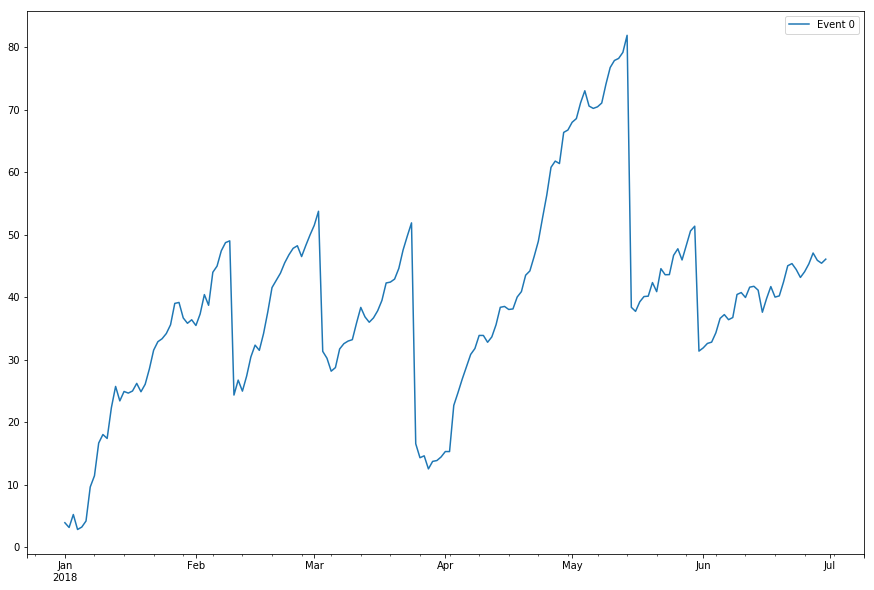

[              Event 0
 2018-01-01   3.906307
 2018-01-02   3.146065
 2018-01-03   5.220628
 2018-01-04   2.824636
 2018-01-05   3.212193
 2018-01-06   4.180017
 2018-01-07   9.625300
 2018-01-08  11.420907
 2018-01-09  16.658679
 2018-01-10  18.023010
 2018-01-11  17.393240
 2018-01-12  22.304077
 2018-01-13  25.716059
 2018-01-14  23.402027
 2018-01-15  24.910472
 2018-01-16  24.649555
 2018-01-17  24.983594
 2018-01-18  26.202937
 2018-01-19  24.862503
 2018-01-20  26.067178
 2018-01-21  28.542745
 2018-01-22  31.522123
 2018-01-23  32.871935
 2018-01-24  33.349783
 2018-01-25  34.184190
 2018-01-26  35.582696
 2018-01-27  39.001631
 2018-01-28  39.153682
 2018-01-29  36.680144
 2018-01-30  35.821923
 ...               ...
 2018-06-01  31.880465
 2018-06-02  32.597018
 2018-06-03  32.804859
 2018-06-04  34.300057
 2018-06-05  36.603695
 2018-06-06  37.212778
 2018-06-07  36.396753
 2018-06-08  36.741441
 2018-06-09  40.430056
 2018-06-10  40.737637
 2018-06-11  39.946551
 2018-06-12

In [36]:
base = WalkEvent(0, NormalEvent(1, 2))
resistance_1 = NormalEvent(0.5, 0.1)

model = \
    TopResistance(
        TopResistance(base, 
                      resistance_value_begin=50,
                      resistance_value_end=55,
                      resistance_probability=0.5, 
                      resistance_strength_event=resistance_1),
        resistance_value_begin=80,
        resistance_value_end=85,
        resistance_probability=0.5, 
        resistance_strength_event=resistance_1)
    

generate_and_plot(model)

We can also use both bottom and top resistance, for instance to insert extra infornation in an AR model supposed to simulate a stock market.

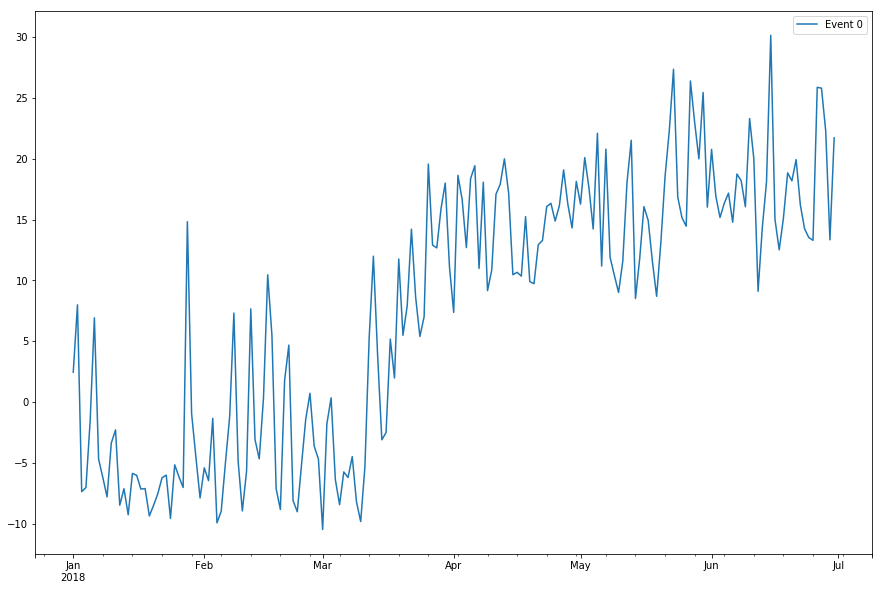

In [29]:
base = ClassicModels.ar(6, error_std=3, coefs=[0.5, 0, 0, 0.3, 0.1, 0.1])
resistance_1 = NormalEvent(0.5, 0.1)

model = \
    BottomResistance(
            TopResistance(base, 
                          resistance_value_begin=20,
                          resistance_value_end=80,
                          resistance_probability=0.999, 
                          resistance_strength_event=resistance_1),
        resistance_value_begin=-10,
        resistance_value_end=-80,
        resistance_probability=0.999, 
        resistance_strength_event=resistance_1)

generate_and_plot(model, n=1)

This shows how existing models can be enriched to achieve more detailed effects.

## Exporting Data

The generated data is given as Pandas Series, so the usual Pandas mechanisms can be used both to customize and to export the generated data. 

In [37]:
data = generate(model,start_date=pd.Timestamp(2018, 1, 1), end_date=pd.Timestamp(2018, 6, 30), 
                      n=1, freq='D')

In [38]:
data[0].to_csv('example_output.csv')
data[0]

,Event 0
2018-01-01,3.906307
2018-01-02,3.146065
2018-01-03,5.220628
2018-01-04,2.824636
2018-01-05,3.212193
2018-01-06,4.180017
2018-01-07,9.625300
2018-01-08,11.420907
2018-01-09,16.658679
2018-01-10,18.023010
